## **En primer lugar importamos las librerías que vamos a necesitar.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from matplotlib.figure import Figure
import plotly.graph_objects as go
from scipy.optimize import minimize
# from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

## **En el segundo paso importamos desde Excel la data de los activos que seleccionemos.**

In [2]:
# Next we will get the stock tickers and the price data.

# Este es el file_path cuando se usa PC
file_path = r'C:\Users\Juan Carlos\Dropbox\Clases\EAFIT\Inversiones\Archivos Excel\Construcción Optimización Portafolios.xlsx'

# Este es el file_path cuando se usa Mac
#file_path = "/Users/juanbotero/Dropbox/Clases/EAFIT/Inversiones/Archivos Excel/Construcción Optimización Portafolios.xlsx"

# Este es el file_path cuando se usa Colab
# file_path = '/content/drive/My Drive/Colab/Excel Files for Colab/Construcción Optimización Portafolios.xlsx'

returns_data = pd.read_excel(file_path, sheet_name='IMI Historical Data (1)')

returns_data.set_index('Date', inplace=True)

column_names = returns_data.columns.tolist()

# Print the column names
print(column_names)

ticker = column_names

print(returns_data.head())
print(returns_data.tail())


['Cemento Argos', 'Bancolombia', 'Ecopetrol', 'Grupo Energía de Bogotá (GEB)', 'ISA']
            Cemento Argos  Bancolombia  Ecopetrol  \
Date                                                
2010-04-04         0.0184       0.0368     0.0093   
2010-04-11         0.0000       0.0095    -0.0128   
2010-04-18         0.0082      -0.0009     0.0335   
2010-04-25        -0.0634      -0.0120    -0.0054   
2010-05-02        -0.0486       0.0113    -0.0344   

            Grupo Energía de Bogotá (GEB)     ISA  
Date                                               
2010-04-04                         0.0040  0.0094  
2010-04-11                        -0.0054  0.0015  
2010-04-18                         0.0375  0.0139  
2010-04-25                        -0.0039 -0.0107  
2010-05-02                        -0.0395 -0.0370  
            Cemento Argos  Bancolombia  Ecopetrol  \
Date                                                
2023-12-03         0.0312       0.0185    -0.0314   
2023-12-10         

## **En el tercer paso calculamos el retorno promedio de los activos, así como su desviación estándar.**

In [39]:
Assets_Returns = 52*returns_data.mean()

print('Annual Asset Returns')
print(Assets_Returns)

print()

Assets_Std = (np.std(returns_data)*np.sqrt(52))
print('Annual Standard Deviations')
print(Assets_Std)

print()



Annual Asset Returns
Cemento Argos                    0.062349
Bancolombia                      0.086836
Ecopetrol                        0.052876
Grupo Energía de Bogotá (GEB)    0.067933
ISA                              0.056063
dtype: float64

Annual Standard Deviations
Cemento Argos                    0.353706
Bancolombia                      0.315354
Ecopetrol                        0.342423
Grupo Energía de Bogotá (GEB)    0.223416
ISA                              0.266878
dtype: float64



C:\Users\Juan Carlos\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


## **En este cuarto paso calculamos el Ratio de Sharpe de cada uno de los activos con los que estamos trabajando.**

In [40]:
risk_free_asset = 0.04

Sharpe_Ratios_Assets = (Assets_Returns - risk_free_asset) / Assets_Std

print('*************Sharpe Ratios****************')
print(Sharpe_Ratios_Assets)

*************Sharpe Ratios****************
Cemento Argos                    0.063186
Bancolombia                      0.148518
Ecopetrol                        0.037604
Grupo Energía de Bogotá (GEB)    0.125028
ISA                              0.060188
dtype: float64


## **En el quinto paso convertimos los precios de los activos a Base 100, con el fin de poderlos apreciar mejor en una gráfica.**

In [41]:
# create price series
# Create a DataFrame with prices starting at 100 for each asset
Prices_Base100 = (1 + returns_data).cumprod() * 100
print(Prices_Base100.head())

            Cemento Argos  Bancolombia   Ecopetrol  \
Date                                                 
2010-04-04     101.840000   103.680000  100.930000   
2010-04-11     101.840000   104.664960   99.638096   
2010-04-18     102.675088   104.570762  102.975972   
2010-04-25      96.165487   103.315912  102.419902   
2010-05-02      91.491845   104.483382   98.896657   

            Grupo Energía de Bogotá (GEB)         ISA  
Date                                                   
2010-04-04                     100.400000  100.940000  
2010-04-11                      99.857840  101.091410  
2010-04-18                     103.602509  102.496581  
2010-04-25                     103.198459  101.399867  
2010-05-02                      99.122120   97.648072  


## **En esta parte vamos a graficar los precios de los activos en base 100.**

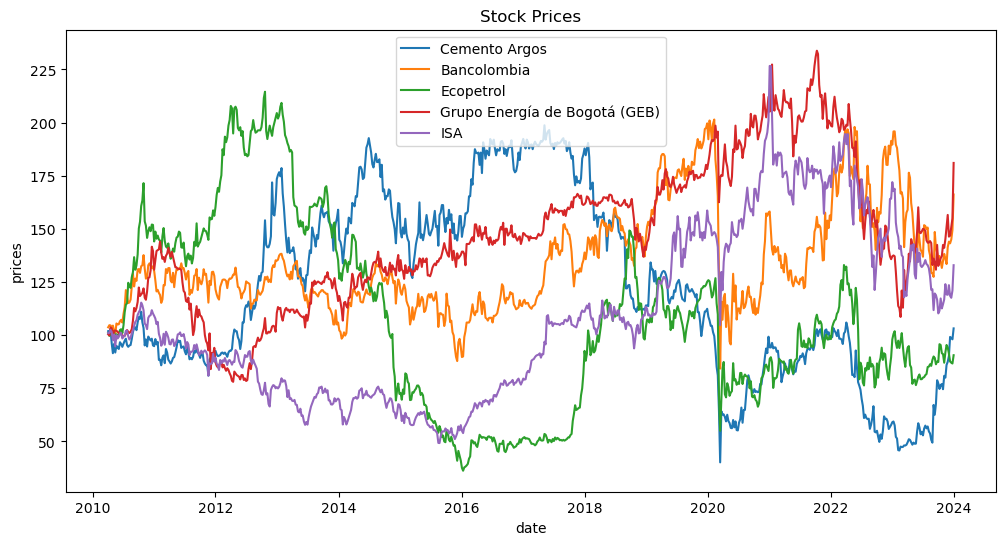

In [42]:
# Increase the size of the graph
plt.figure(figsize=(12, 6))

# plotting the points
plt.plot(Prices_Base100, label=(ticker))

# naming the x axis
plt.xlabel('date')
# naming the y axis
plt.ylabel('prices')

# giving a title to my graph
plt.title('Stock Prices')

# Adding legends based on column names in the DataFrame
plt.legend()


# function to show the plot
plt.show()

## **Ahora Calcularemos tanto la Matriz de Correlaciones como la Matriz de Varianza-Covarianza**

In [51]:
Mat_Correlaciones = returns_data.corr()

print('**********************Correlation Matrix**************************')

print(Mat_Correlaciones)

print()
print('****************Matrix Variance-Covariance (Annual)***************')
Mat_Var_Covar = returns_data.cov()*52
print(Mat_Var_Covar)


**********************Correlation Matrix**************************
                               Cemento Argos  Bancolombia  Ecopetrol  \
Cemento Argos                       1.000000     0.478794   0.387883   
Bancolombia                         0.478794     1.000000   0.434798   
Ecopetrol                           0.387883     0.434798   1.000000   
Grupo Energía de Bogotá (GEB)       0.249157     0.152674   0.281626   
ISA                                 0.401663     0.491330   0.366111   

                               Grupo Energía de Bogotá (GEB)       ISA  
Cemento Argos                                       0.249157  0.401663  
Bancolombia                                         0.152674  0.491330  
Ecopetrol                                           0.281626  0.366111  
Grupo Energía de Bogotá (GEB)                       1.000000  0.187277  
ISA                                                 0.187277  1.000000  

****************Matrix Variance-Covariance (Annual)**********

## **Ahora vamos a calcular el retorno y varianza de un portafolio de pesos iguales (Equally Weighted)**

In [46]:
num_assets = len(ticker)
W_equal = np.ones(num_assets) / num_assets
print(W_equal)
print()
print('*********Assets_Returns*************')
print(Assets_Returns)

print()

print('Return of an Equally Weighted Portfolio:')
Return_Equally_Weighted = np.dot(W_equal, Assets_Returns)
print(Return_Equally_Weighted)

print()

print('Variance of an Equally Weighted Portfolio:')
Variance_Equally_Weighted = np.dot(np.dot(W_equal, Mat_Var_Covar), W_equal.T)
print(f"{Variance_Equally_Weighted:.2%}")

print()

print('Sharpe Ratio of Individual Assets:')
SR_Individual_Assets = (Assets_Returns - risk_free_asset) / Assets_Std
print(SR_Individual_Assets)

print()

print('Sharpe Ratio of an Equally Weighted Portfolio:')
SR_Equally_Weighted = (Return_Equally_Weighted - risk_free_asset) / np.sqrt(Variance_Equally_Weighted)
print(SR_Equally_Weighted)

[0.2 0.2 0.2 0.2 0.2]

*********Assets_Returns*************
Cemento Argos                    0.062349
Bancolombia                      0.086836
Ecopetrol                        0.052876
Grupo Energía de Bogotá (GEB)    0.067933
ISA                              0.056063
dtype: float64

Return of an Equally Weighted Portfolio:
0.06521147632311979

Variance of an Equally Weighted Portfolio:
4.44%

Sharpe Ratio of Individual Assets:
Cemento Argos                    0.063186
Bancolombia                      0.148518
Ecopetrol                        0.037604
Grupo Energía de Bogotá (GEB)    0.125028
ISA                              0.060188
dtype: float64

Sharpe Ratio of an Equally Weighted Portfolio:
0.11959827940632695


## **A continuación simulamos muchos vectores W y para cada uno, calculamos el retorno del portafolio de riesgo, su desviación estándar y el Ratio de Sharpe**

In [47]:
num_assets = len(ticker)

# Simulating 10.000 portfolios
num_port = 100000

# Creating an empty array to store portfolio weights
all_weights = np.zeros((num_port, len(ticker)))

# Creating an empty array to store portfolio returns
returns = np.zeros((num_port))

# Creating an empty array to store portfolio risks
stand_dev = np.zeros((num_port))

# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

# Lets run the for loop.
for i in range(num_port):
  weights = np.array(np.random.random(num_assets))
  weights = weights/np.sum(weights)

  # saving weights in the array
  all_weights[i,:] = weights

  # Saving Portfolio returns
  returns[i] = np.dot(weights, Assets_Returns)

  # Portfolio Risk
  stand_dev[i]= np.sqrt(np.dot(np.dot(weights, Mat_Var_Covar), weights.T))

  # Portfolio Sharpe Ratio
  sharpe_ratio[i] = (returns[i] - risk_free_asset) / stand_dev[i]


## **Seguidamente vamos a seleccionar el portafolio que tenga el máximo Ratio de Sharpe y ese será el portafolio óptimo**

                               optimal weight
Cemento Argos                        0.007265
Bancolombia                          0.446969
Ecopetrol                            0.010284
Grupo Energía de Bogotá (GEB)        0.533177
ISA                                  0.002305

Sharpe Ratio Óptimo = 0.17956563678156925

*** Sharpe Ratio Assets ***
Cemento Argos                    0.063186
Bancolombia                      0.148518
Ecopetrol                        0.037604
Grupo Energía de Bogotá (GEB)    0.125028
ISA                              0.060188
dtype: float64


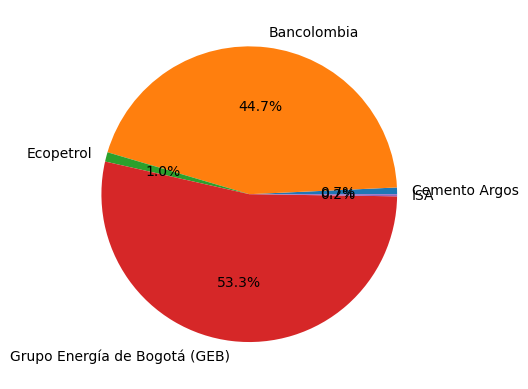

In [48]:
sharpe_ratio.max()

sharpe_ratio.argmax()

optimal_weights = all_weights[sharpe_ratio.argmax(),:]

return_optimal_portfolio = returns[sharpe_ratio.argmax()]

std_dev_optimal_portfolio = stand_dev[sharpe_ratio.argmax()]

df = pd.DataFrame(optimal_weights, columns=['optimal weight'], index=ticker)

print(df)
print()
print(f'Sharpe Ratio Óptimo = {sharpe_ratio.max()}')
print()
print('*** Sharpe Ratio Assets ***')
print(Sharpe_Ratios_Assets)

plt.pie(optimal_weights, labels=ticker, autopct='%1.1f%%')

plt.show()


## **Ahora vamos a graficar todos los portafolios simulados**

C:\Users\Juan Carlos\AppData\Local\Temp\ipykernel_15812\3912965922.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(Assets_Std[i], Assets_Returns[i], label)


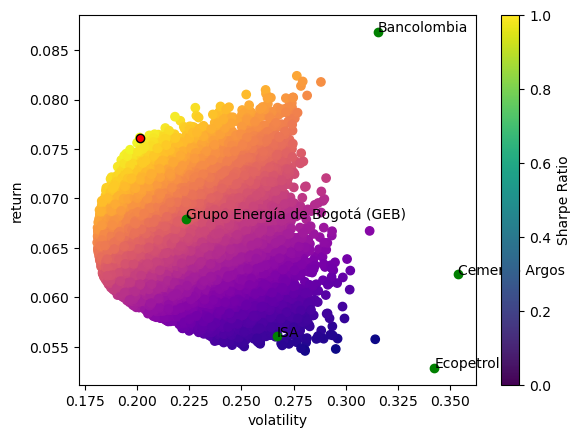

In [49]:
plt.scatter(stand_dev, returns, c=sharpe_ratio, cmap='plasma')
plt.scatter(Assets_Std, Assets_Returns, c='green')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('volatility')
plt.ylabel('return')

labels = ticker
for i, label in enumerate(labels):
    plt.text(Assets_Std[i], Assets_Returns[i], label)

plt.scatter(std_dev_optimal_portfolio, return_optimal_portfolio, c='red', edgecolors='black')